In [18]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

This counts matrix contains all batches of the atlas dataset. Notice when we load it in that the columns are already loaded with the assignment from their clustering. All the cells contained in this dataframe passed their filtering criteria and were kept for analysis. Can you confirm this? What is the range of total UMI counts per cell among this sample? How many genes is each cell expressing? 

In [21]:
data_dir = "/oasis/tscc/scratch/cshl_2018/atlas1_full_counts/"
save_dir = "/home/ucsd-train25/scratch/projects/haber_atlas_batch1/processed_files/"
#!mkdir -p $save_dir

counts = pd.read_table(data_dir+"GSE92332_atlas_UMIcounts.txt", index_col=0)
print(counts.shape)
counts.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,3,2,0,0,0,12,0,0,4,5
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,2,0,0,0,1


In [22]:
total_umi_counts = pd.DataFrame(counts.sum())
#rename using a dictionary. Inplace=True updates the dataframe without
#requiring assignment to a new variable. 
total_umi_counts.rename(columns = {0:"total_umi_count"}, inplace=True)
total_umi_counts.head()

,total_umi_count
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,6109
B1_AAACCGTGCCAAGT_Tuft,2964
B1_AAACGCACAGCCTA_Goblet,8014
B1_AAACGCACCAGATC_Endocrine,8796
B1_AAACGCACCGCCTT_Stem,6824


In [23]:
num_genes_expressed = pd.DataFrame((counts > 0).sum())
num_genes_expressed.rename(columns = {0:"num_genes_expressed"}, inplace=True)
num_genes_expressed.head()

,num_genes_expressed
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,1829
B1_AAACCGTGCCAAGT_Tuft,1305
B1_AAACGCACAGCCTA_Goblet,2215
B1_AAACGCACCAGATC_Endocrine,2789
B1_AAACGCACCGCCTT_Stem,2094


Text(0,0.5,'umi count per cell')

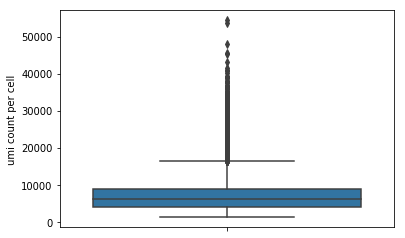

In [24]:
sns.boxplot(total_umi_counts, orient = 'v')
plt.ylabel('umi count per cell')

In [25]:
#What is the minimum number of UMIs counted in a cell? 

total_umi_counts['total_umi_count'].min()

1155

In [26]:
#What is the minimum number of genes expressed by a cell? 

num_genes_expressed['num_genes_expressed'].min()

801

Text(0,0.5,'number of genes expressed per cell')

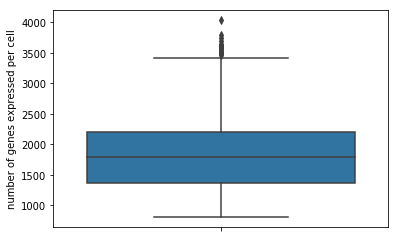

In [27]:
sns.boxplot(num_genes_expressed, orient='v')
plt.ylabel('number of genes expressed per cell')

You noticed from the counts.shape command that this dataset contains 15971 genes. How many cells is each gene expressed in? What is the minimum number? What is the maximum number? 

In [28]:
counts.head()

,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,2,1,2,2,0,4,0,1,4,0,...,3,2,0,0,0,12,0,0,4,5
Lypla1,2,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
Gm37988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tcea1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atp6v1h,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,2,0,0,0,1


In [29]:
(counts > 0).sum(axis=1).head(20)

Mrpl15           4353
Lypla1           2537
Gm37988             3
Tcea1             847
Atp6v1h           963
Rb1cc1            712
4732440D04Rik     171
Fam150a             2
St18               54
Pcmtd1            367
Gm26901           134
Gm30414             5
Rrs1             1445
Adhfe1             14
Mybl1              18
Vcpip1            375
1700034P13Rik      48
Sgk3              146
Mcmdc2              8
Snhg6            1832
dtype: int64

You will notice that there are some genes expressed in very few number of cells. In the methods section from this paper, the authors moved forward with all of these genes for the next steps. 

**Counts to TPM**

In [30]:
tpm = (counts / counts.sum()) * 10000
print(tpm.shape)
tpm.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,3.273858,3.373819,2.495633,2.273761,0.0,4.713091,0.0,1.920492,2.990431,0.0,...,3.446691,1.757469,0.0,0.000000,0.0,8.877710,0.0,0.0,10.992031,1.923151
Lypla1,3.273858,0.000000,0.000000,1.136880,0.0,0.000000,0.0,0.000000,0.747608,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.739809,0.0,0.0,0.000000,0.384630
Gm37988,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.878735,0.0,2.082899,0.0,1.479618,0.0,0.0,0.000000,0.384630


In [31]:
tpm.to_csv(save_dir+"tpm_all.csv")

In [14]:
import numpy as np

tpm_log2 = np.log2(tpm + 1)
print(tpm_log2.shape)
tpm_log2.head()

(9006, 1385)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B1_TTTAGAGAACGGAG_Enterocyte.Immature.Distal,B1_TTTAGAGAGGAAAT_Stem,B1_TTTAGGCTCTCTTA_Paneth,B1_TTTCACGAAGTGTC_TA.Early,B1_TTTCACGACACACA_Enterocyte.Progenitor.Early,B1_TTTCACGAGAGGCA_Stem,B1_TTTCCAGAACGCTA_Goblet,B1_TTTCCAGATGCAAC_Enterocyte.Progenitor,B1_TTTCGAACTACTGG_Stem,B1_TTTCTACTTCACCC_Enterocyte.Progenitor.Late
Mrpl15,2.811195,2.842544,2.456632,2.364639,0.0,3.28836,0.0,2.164889,2.687548,0.0,...,0.0,2.661239,1.746142,1.952432,0.0,4.924507,2.529389,2.808097,0.0,4.237039
Lypla1,2.811195,0.000000,0.000000,1.620642,0.0,0.00000,0.0,0.000000,1.239120,0.0,...,0.0,1.472619,0.000000,1.952432,0.0,0.000000,3.028552,0.000000,0.0,4.237039
Gm37988,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
Tcea1,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,1.472619,0.000000,0.000000,0.0,0.000000,0.000000,2.322621,0.0,2.797507
Atp6v1h,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [15]:
tpm_log2.sum()

B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal      2893.055251
B1_AAACCGTGCCAAGT_Tuft                            2532.516291
B1_AAACGCACAGCCTA_Goblet                          3054.632354
B1_AAACGCACCAGATC_Endocrine                       3665.484032
B1_AAACGCACCGCCTT_Stem                            3104.825735
B1_AAACGCACCGTAGT_Stem                            3400.577734
B1_AAACGGCTGATAGA_TA.Early                        3154.285918
B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal      3014.992056
B1_AAACTTGACCACAA_TA.G1                           3872.890449
B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal      2141.777887
B1_AAAGAGACGAGGAC_TA.G1                           3772.855978
B1_AAAGATCTAGATCC_TA.G2                           3563.334692
B1_AAAGCAGACTACGA_Enterocyte.Progenitor.Early     3672.821477
B1_AAAGCCTGAGATGA_Enterocyte.Immature.Distal      3080.989698
B1_AAAGGCCTCGTAGT_Tuft                            3537.250706
B1_AAAGGCCTCGTTGA_Enterocyte.Progenitor.Late      3257.481880
B1_AAATA

In [17]:
tpm_log2.to_csv(save_dir+"log2_tpm_batch1.csv")

# Make a file with batch assignment

In [38]:
tpm_log2.T.head()

,Mrpl15,Lypla1,Gm37988,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Fam150a,St18,Pcmtd1,...,Cacul1,Nanos1,Eif3a,Fam45a,Sfxn4,Prdx3,Grk5,Zfp950,Gm7102,Csf2ra
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,2.095539,2.095539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.398859,0.0,0.000000,0.0,0.0,2.563350,0.0,0.000000,0.0,0.0
B1_AAACCGTGCCAAGT_Tuft,2.128894,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
B1_AAACGCACAGCCTA_Goblet,1.805554,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.168524,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
B1_AAACGCACCAGATC_Endocrine,1.710949,1.095506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,3.755495,0.0,0.0,0.000000,0.0,1.095506,0.0,0.0
B1_AAACGCACCGCCTT_Stem,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.974835,0.0,0.0,1.301831,0.0,0.000000,0.0,0.0


In [39]:
df = tpm_log2.T.reset_index()
df.head()

,index,Mrpl15,Lypla1,Gm37988,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Fam150a,St18,...,Cacul1,Nanos1,Eif3a,Fam45a,Sfxn4,Prdx3,Grk5,Zfp950,Gm7102,Csf2ra
0,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,2.095539,2.095539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.398859,0.0,0.000000,0.0,0.0,2.563350,0.0,0.000000,0.0,0.0
1,B1_AAACCGTGCCAAGT_Tuft,2.128894,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,B1_AAACGCACAGCCTA_Goblet,1.805554,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.168524,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,B1_AAACGCACCAGATC_Endocrine,1.710949,1.095506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,3.755495,0.0,0.0,0.000000,0.0,1.095506,0.0,0.0
4,B1_AAACGCACCGCCTT_Stem,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.974835,0.0,0.0,1.301831,0.0,0.000000,0.0,0.0


In [40]:
df['batch'] = df['index'].apply(lambda x: x.split("_")[0])
batch_assignment = df[['index','batch']].set_index('index')

In [56]:
batch_assignment.head()

,batch
index,
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1
B1_AAACCGTGCCAAGT_Tuft,B1
B1_AAACGCACAGCCTA_Goblet,B1
B1_AAACGCACCAGATC_Endocrine,B1
B1_AAACGCACCGCCTT_Stem,B1


In [42]:
batch_assignment.to_csv(save_dir+"batch_id.csv")

index
B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal    (0.12156862745098039, 0.4666666666666667, 0.70...
B1_AAACCGTGCCAAGT_Tuft                          (0.12156862745098039, 0.4666666666666667, 0.70...
B1_AAACGCACAGCCTA_Goblet                        (0.12156862745098039, 0.4666666666666667, 0.70...
B1_AAACGCACCAGATC_Endocrine                     (0.12156862745098039, 0.4666666666666667, 0.70...
B1_AAACGCACCGCCTT_Stem                          (0.12156862745098039, 0.4666666666666667, 0.70...
Name: batch, dtype: object